Importing necessery libraries for future analysis of the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings('ignore')

In [3]:
'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

In [4]:
'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
# import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

Using pandas library and read_csv function to read the CSV file

In [5]:
dataset = pd.read_csv('Airbnb_CA2.csv')

In [6]:
dataset.shape  #Checking the number of row and columns

(48895, 16)

In [7]:
dataset.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Summary of Dataset

In [9]:
print('Rows     :',dataset.shape[0])
print('Columns  :',dataset.shape[1])
print('\nFeatures :\n     :',dataset.columns.tolist())
print('\nMissing values    :',dataset.isnull().values.sum())
print('\nUnique values :  \n',dataset.nunique())

Rows     : 48895
Columns  : 16

Features :
     : ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Missing values    : 20141

Unique values :  
 id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: i

In [10]:
dataset.shape

(48895, 16)

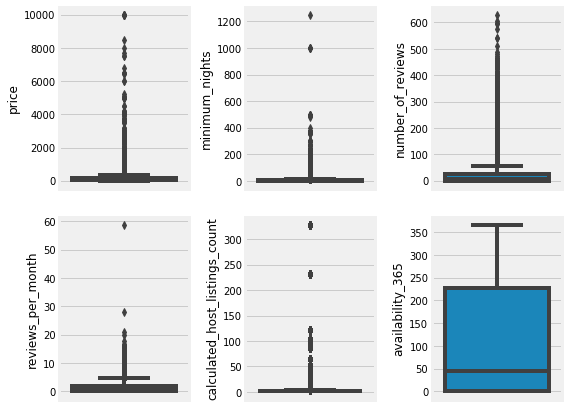

In [11]:
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.boxplot(y = dataset['price']) 

subplot(2,3,2)
sns.boxplot(y = dataset['minimum_nights'])

subplot(2,3,3)
sns.boxplot(y = dataset['number_of_reviews'])

subplot(2,3,4)
sns.boxplot(y = dataset['reviews_per_month'])

subplot(2,3,5)
sns.boxplot(y = dataset['calculated_host_listings_count'])

subplot(2,3,6)
sns.boxplot(y = dataset['availability_365'])

plt.tight_layout() # avoid overlap of plots
plt.draw()

Most features are left-skewed.

In [12]:
dataset.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


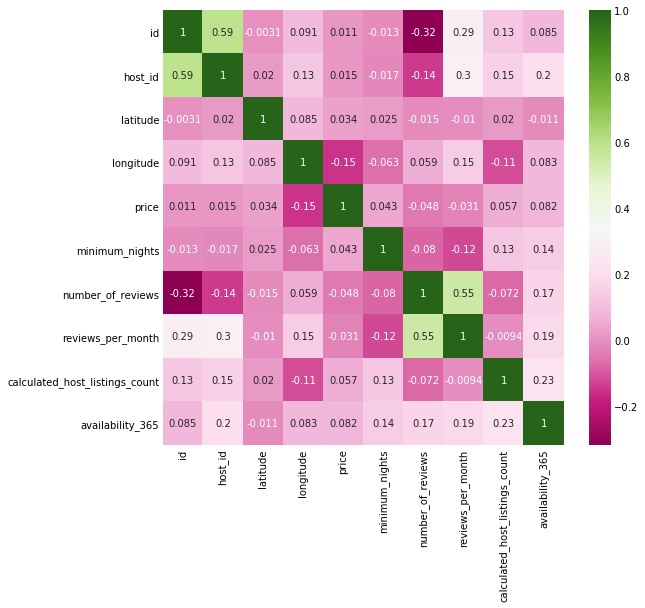

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(dataset.corr(),annot=True,cmap = 'PiYG')

In [14]:
dataset_pairplot = dataset.dropna()


In [15]:
# count and percentage of missing values


total = dataset.isnull().sum().sort_values(ascending=False)
percent = ((dataset.isnull().sum())*100)/dataset.isnull().count().sort_values(ascending=False)
missing_dataset = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_dataset.head(10)

,Total,Percent
reviews_per_month,10052,20.558339
last_review,10052,20.558339
host_name,21,0.042949
name,16,0.032723
availability_365,0,0.000000
calculated_host_listings_count,0,0.000000
number_of_reviews,0,0.000000
minimum_nights,0,0.000000
price,0,0.000000
room_type,0,0.000000


Here we are getting the count and the percentage of missing values.We can see that 20% of the values are missing in the columns reviews_per_month and last_review.

In [16]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


1.From the above table we can see than the mean price of rooms is 157 dollars.The maximum price of a room is 10000 dollars

2.On an average people spend 7 days in rooms.This kind of indicates people prefer a week of holiday.From the data we can see some one stayed for 1250 days which is nearly 4 years.

In [17]:
# Dropping the column which are not that usable and filling null values


dataset.drop(['name','id','host_name','last_review'],axis=1,inplace=True)
dataset['reviews_per_month']=dataset['reviews_per_month'].replace(np.nan, 0)


In [18]:
dataset.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [19]:
dataset.head(10)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


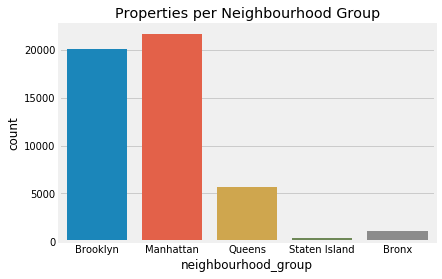

In [20]:
title = 'Properties per Neighbourhood Group'
sns.countplot(dataset['neighbourhood_group'])
plt.title(title)
plt.ioff()

The maximum number of properties are located in Brooklyn and Manhattan

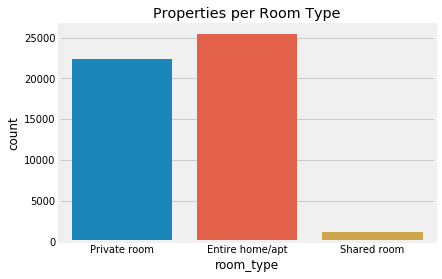

In [21]:
title = 'Properties per Room Type'
sns.countplot(dataset['room_type'])
plt.title(title)
plt.ioff()

The maximum number of properties are available in Entire home or Private room type.

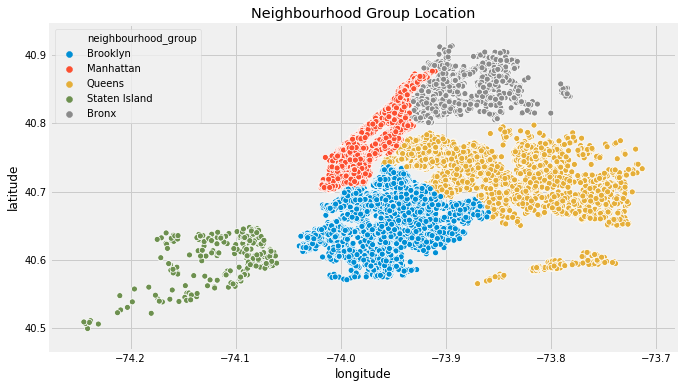

In [22]:
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(dataset.longitude,dataset.latitude,hue=dataset.neighbourhood_group).set_title(title)
plt.ioff()


The highest Density areas are marked in red and lowest density areas are marked in blue color.

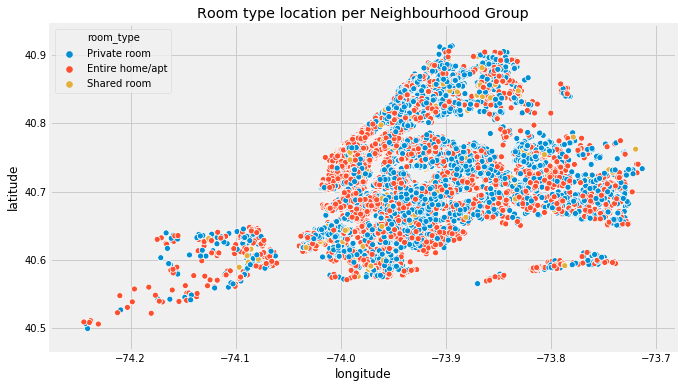

In [23]:
title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(dataset.longitude,dataset.latitude,hue=dataset.room_type).set_title(title)
plt.ioff()

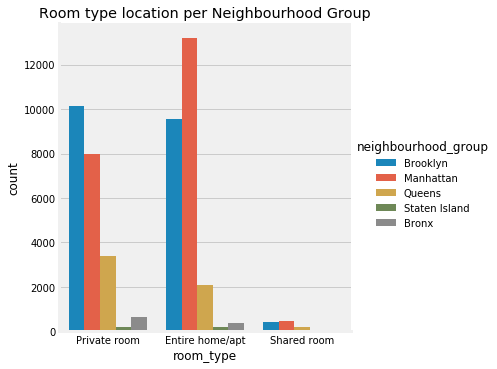

In [24]:
title = 'Room type location per Neighbourhood Group'
sns.catplot(x='room_type', kind="count", hue="neighbourhood_group", data=dataset);
plt.title(title)
plt.ioff()

A majority of Entire home/apt are located in Manhattan and a majority of Private rooms are located in Brooklyn

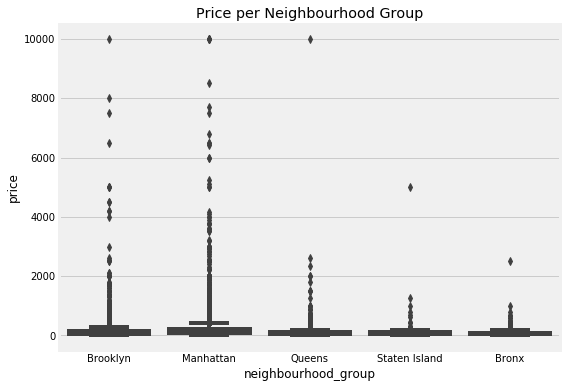

In [25]:

x= 'neighbourhood_group'
y= 'price'
title = 'Price per Neighbourhood Group'

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=dataset)
plt.title(title)
plt.ioff()

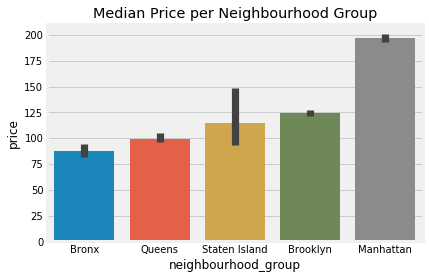

In [26]:
title = 'Median Price per Neighbourhood Group'
result = dataset.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data=dataset, order=result['neighbourhood_group'])
plt.title(title)
plt.ioff()

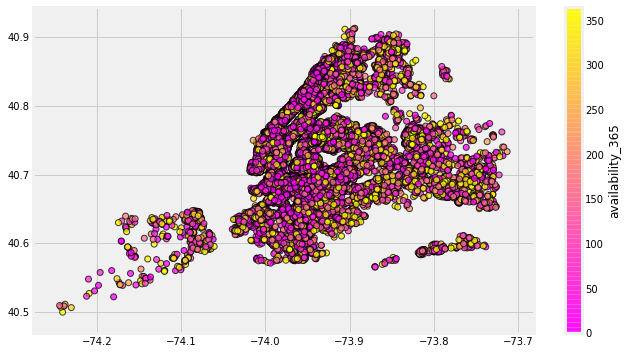

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(dataset.longitude, dataset.latitude, c=dataset.availability_365, cmap='spring', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('availability_365')

Yellow region on the map shows the places which have more room availabe throughout the year.So we book based on the region where more rooms are available there is possibility of getting cheaper rates.

In [28]:
# Use on way ANOVA and pairwise comparison
import statsmodels.api as sm
from statsmodels.formula.api import ols

data_filtered = dataset.loc[dataset['price'] < 175]

mod = ols('price ~ neighbourhood_group',data=data_filtered).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                           sum_sq       df           F  PR(>F)
neighbourhood_group  4.196265e+06      4.0  806.849617     0.0
Residual             4.674220e+07  35950.0         NaN     NaN


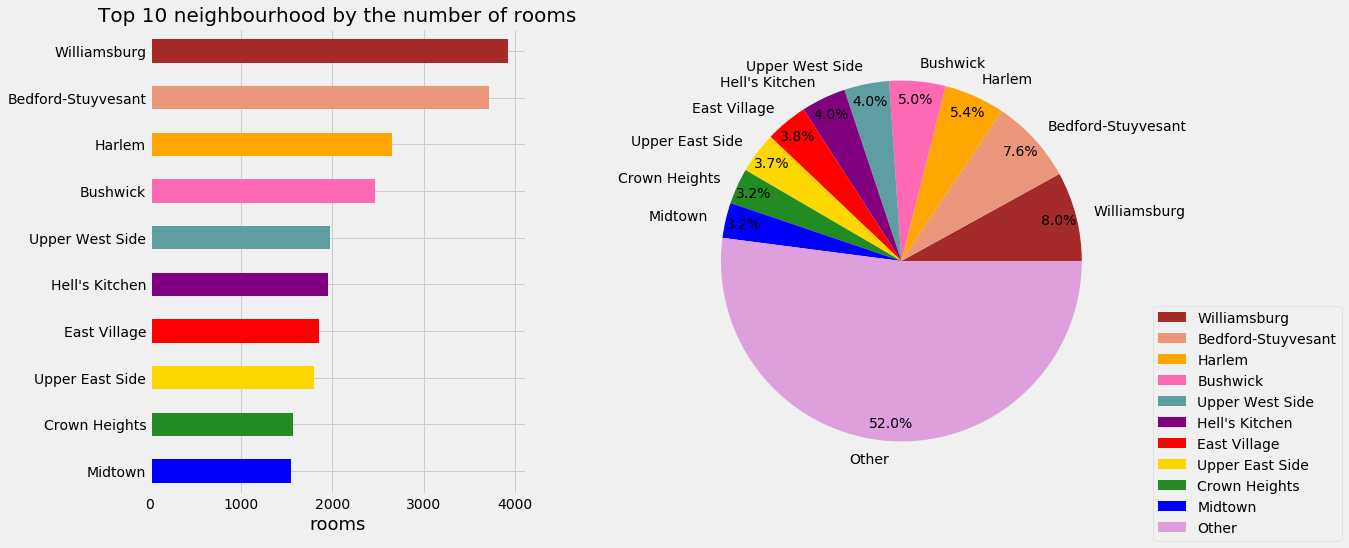

In [29]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
dataset.neighbourhood.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 neighbourhood by the number of rooms",size=20)
ax[0].set_xlabel('rooms',size=18)


count=dataset['neighbourhood'].value_counts()
groups=list(dataset['neighbourhood'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')
pass

Williamsburg,Bedford-Stuyvesant and Hariem have highest number of rooms.

In [30]:
'''Encode labels with value between 0 and n_classes-1.'''
le = preprocessing.LabelEncoder()                                            # Fit label encoder
le.fit(dataset['neighbourhood_group'])
dataset['neighbourhood_group']=le.transform(dataset['neighbourhood_group'])    # Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(dataset['neighbourhood'])
dataset['neighbourhood']=le.transform(dataset['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(dataset['room_type'])
dataset['room_type']=le.transform(dataset['room_type'])

dataset.sort_values(by='price',ascending=True,inplace=True)

dataset.head(10)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25796,86327101,1,13,40.68258,-73.91284,1,0,1,95,4.35,6,222
25634,15787004,1,28,40.69467,-73.92433,1,0,2,16,0.71,5,0
25433,131697576,0,62,40.83296,-73.88668,1,0,2,55,2.56,4,127
25753,1641537,1,91,40.72462,-73.94072,1,0,2,12,0.53,2,0
23161,8993084,1,13,40.69023,-73.95428,1,0,4,1,0.05,4,28
25795,86327101,1,13,40.68279,-73.91170,1,0,1,95,4.37,6,232
26841,101970559,1,28,40.69211,-73.90670,2,0,30,2,0.11,6,333
25778,10132166,1,214,40.70838,-73.94645,0,0,5,3,0.15,1,73
25794,86327101,1,13,40.68173,-73.91342,1,0,1,93,4.28,6,176
26866,101970559,1,28,40.69166,-73.90928,2,0,30,5,0.26,6,139


Here Outliers are removed.

In [31]:
# Removing the outliers from the column Price

min_thresold1, max_thresold1 = dataset.price.quantile([0.05, 0.95])
min_thresold1, max_thresold1

dataset = dataset[(dataset.price<max_thresold1) & (dataset.price>min_thresold1)]
dataset.shape

(43631, 12)

### Applying First Machine Learning Model

In [32]:
# Applying Linear Regression Model
regressor = LinearRegression()

X = dataset[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Calculations performed

In [33]:
'''Get Predictions'''
y_pred = regressor.predict(X_test)

print("Multiple Linear Regression:\n")
print("RSS: {}".format(((y_test-y_pred)**2).sum()))
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred)))
print("Root Mean Squared Error: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("Accuracy: "+ str(regressor.score(X_test,y_test)*100) + "%")


R2 = r2_score(y_test,y_pred)
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

print("Mean Absolute Percentage Error(MAPE): {}".format(np.round(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)),2)


Multiple Linear Regression:

RSS: 25864200.95393068
Mean absolute error: 40.352747673649404
Mean squared error: 2963.6989748975225
Root Mean Squared Error: 54.439865676703526
Accuracy: 40.88921782251988%
R Squared: 0.40889217822519885
Adjusted R Squared: 0.4082139911878252
Mean Absolute Percentage Error(MAPE): 37.0 2


### Difference Between actual and predicted Values

In [34]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': np.round(y_pred.flatten(),2)}).head(10)

error_airbnb

,Actual Values,Predicted Values
0,72,101.50
1,125,128.91
2,150,160.24
3,110,80.98
4,120,172.14
5,100,81.49
6,80,79.73
7,249,159.29
8,200,180.53
9,125,144.75


In [35]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_airbnb.index, y=error_airbnb['Predicted Values']),
    go.Bar(name='Actual', x=error_airbnb.index, y=error_airbnb['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

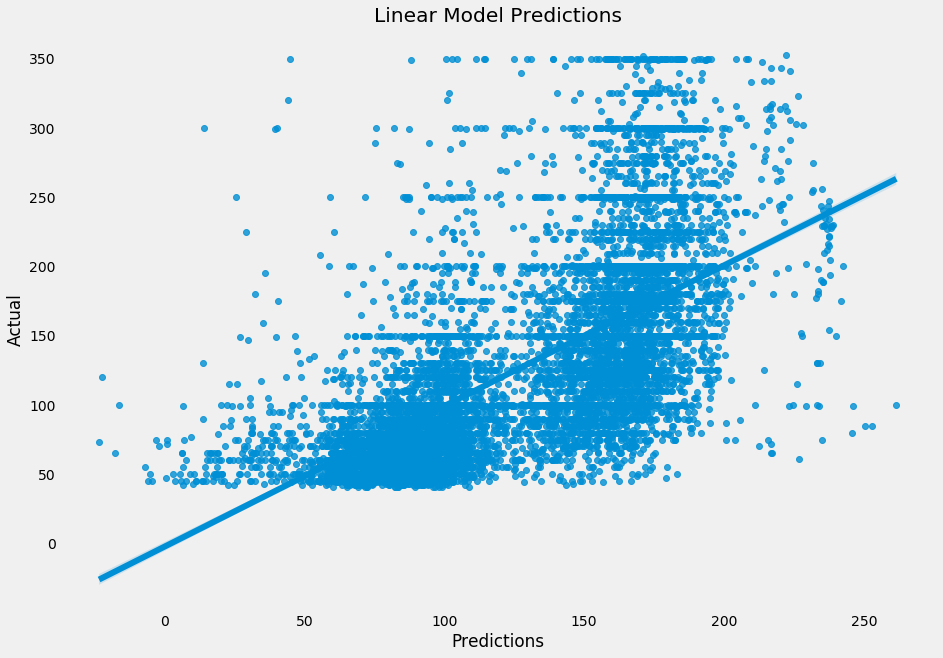

In [36]:
plt.figure(figsize=(14,10))
sns.regplot(y_pred,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()

### Applying Second Machine Learning Model

In [37]:
'''Gradient Boosted Regressor'''
GBregressor = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBregressor.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Performing Calculations

In [38]:
'''Get Predictions & Metrics'''
y_pred2 = GBregressor.predict(X_test)

print("Gradient Boosting Regression:\n")
print("RSS: {}".format(((y_test-y_pred2)**2).sum()))
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred2)))
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred2)))
print("Root Mean Squared Error: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred2))))
print("Accuracy: "+ str(GBregressor.score(X_test,y_test)*100) + "%")


R2 = r2_score(y_test,y_pred2)
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

print("Mean Absolute Percentage Error(MAPE): {}".format(np.round(np.mean(np.abs((y_test - y_pred2) / y_test)) * 100)),2)

Gradient Boosting Regression:

RSS: 19873264.86716741
Mean absolute error: 34.38385923365035
Mean squared error: 2277.216095699256
Root Mean Squared Error: 47.72018541140904
Accuracy: 54.58107394035021%
R Squared: 0.5458107394035021
Adjusted R Squared: 0.5452896411237906
Mean Absolute Percentage Error(MAPE): 29.0 2


### Difference Between Actual and Predicted Values

In [39]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': np.round(y_pred2.flatten(),2)}).head(20)

error_airbnb.head(10)

,Actual Values,Predicted Values
0,72,99.67
1,125,158.66
2,150,147.32
3,110,83.00
4,120,193.62
5,100,74.46
6,80,76.19
7,249,163.51
8,200,208.62
9,125,141.29


In [40]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_airbnb.index, y=error_airbnb['Predicted Values']),
    go.Bar(name='Actual', x=error_airbnb.index, y=error_airbnb['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

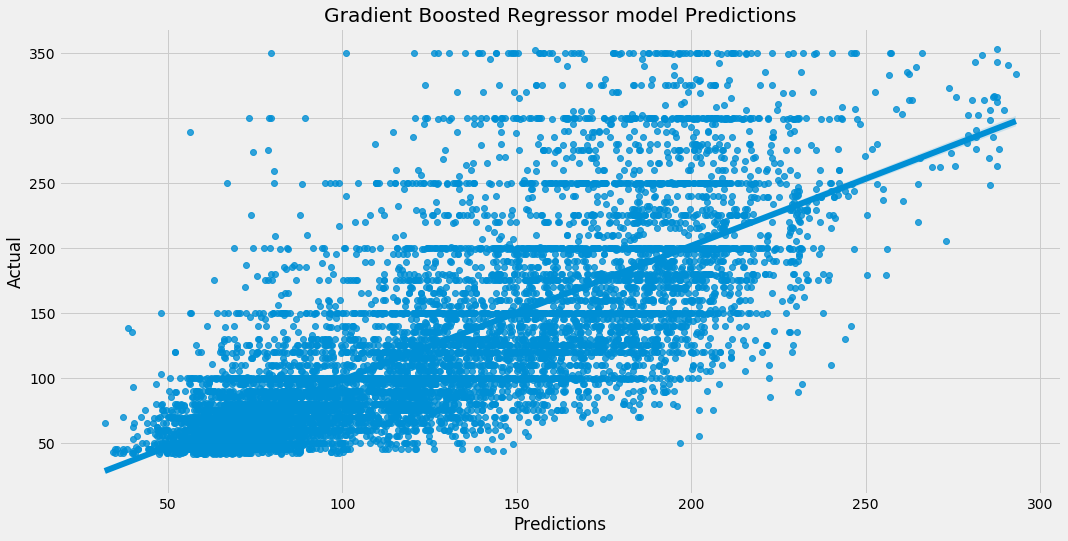

In [41]:
plt.figure(figsize=(16,8))
sns.regplot(y_pred2,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Gradient Boosted Regressor model Predictions")
plt.show()

### Third Machine Learning Model performed just to check if Gradient Boosting is the better or not 

In [42]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [43]:
'''Get Predictions & Metrics'''
y_pred3 = rfr.predict(X_test)

print("Random Forest Regression:\n")
print("RSS: {}".format(((y_test-y_pred3)**2).sum()))
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred3)))
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred3)))
print("Root Mean Squared Error: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred3))))
print("Accuracy: "+ str(rfr.score(X_test,y_test)*100) + "%")


R2 = r2_score(y_test,y_pred3)
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

print("Mean Absolute Percentage Error(MAPE): {}".format(np.round(np.mean(np.abs((y_test - y_pred3) / y_test)) * 100)),2)

Random Forest Regression:

RSS: 20407343.21853978
Mean absolute error: 34.74421479229287
Mean squared error: 2338.4144859103676
Root Mean Squared Error: 48.35715547786457
Accuracy: 53.36047605101615%
R Squared: 0.5336047605101615
Adjusted R Squared: 0.5330696581243309
Mean Absolute Percentage Error(MAPE): 30.0 2


In [44]:
error_airbnb1 = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': np.round(y_pred3.flatten(),2)}).head(20)

error_airbnb1

,Actual Values,Predicted Values
0,72,97.98
1,125,126.92
2,150,180.52
3,110,86.66
4,120,200.74
5,100,68.69
6,80,69.76
7,249,169.21
8,200,210.94
9,125,141.53
